In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from transformers import Trainer
from transformers import BertTokenizer, BertForSequenceClassification
from classifier_trainer_bert import Dataset, clean_txt


model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
PATH = "../data/binary/us-politicians.pickle"
test_data = pd.read_pickle(PATH)
test_data = test_data.sample(10000)
test_data['quotation'] = test_data['quotation'].apply(clean_txt)
X_test = list(test_data["quotation"])
X_test_tokenized = tokenizer(X_test, padding=True, truncation=True, max_length=512)

# Create torch dataset
test_dataset = Dataset(X_test_tokenized)

# Load trained model
model_path = "output/checkpoint-5000"
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=7)

# Define test trainer
test_trainer = Trainer(model)

loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at C:\Users\eliaf/.cache\huggingface\transformers\45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at C:\Users\eliaf/.cache\huggingface\transformers\c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at C:\Users\eliaf/.cache\huggingface\transformers\534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b60

In [14]:
# Make prediction
raw_pred, _, _ = test_trainer.predict(test_dataset)
# Preprocess raw predictions
y = np.argmax(raw_pred, axis=1)
# 1: External Relations
# 2: Freedom and Democracy
# 3: Political System
# 4: Economy
# 5: Welfare and quality of life
# 6: Fabric of Society
# 7: Social Groups

***** Running Prediction *****
  Num examples = 10000
  Batch size = 8


In [15]:
pd.set_option('display.max_colwidth',None)
test_data['topic'] = y
topic_map = {0:"External Relations", 1: "Freedom and Democracy", 2: "Political System", 3: "Economy", 4: "Welfare and quality of life", 5: "Fabric of Society", 6: "Social Groups"}
test_data['topic'] = test_data['topic'].map(topic_map)
sample = test_data.sample(50)
sample

,speaker_id,quote_id,quotation,speaker,party,Date-Time,topic
267459,22686,2016-09-27-145158,who makes you feel secure,Donald Trump,29468,2016-09-27,Fabric of Society
424562,22686,2017-06-01-000161,but begin negotiations reenter the Paris accord or an entirely new transaction on terms that are fair to the United States its businesses its workers its people its taxpayers,Donald Trump,29468,2017-06-01,External Relations
1388948,1124,2016-08-24-043139,I made it clear that if she becomes President well have to do more than we did when she was Secretary of State because if you make a mistake theres always an appeal to the White House if youre Secretary of State If youre President you cant But were gon na transition all these responsibilities that would require foreign or corporate donations which I will accept And I wont raise money for the foundation if she wins and Im happy to do the transition as quickly as we can Weve already found partners who are going to do take over some of this stuff but we have to do it in a way that no one loses their job no one loses their income and no one loses their life That is all Im concerned about,Bill Clinton,29552,2016-08-24,Political System
870720,22686,2020-02-12-083406,The American patient should never be blindsided by medical bills,Donald Trump,29468,2020-02-12,Economy
270267,22686,2016-07-24-071670,Well I think that Im an honest person,Donald Trump,29468,2016-07-24,Fabric of Society
750490,22686,2019-06-29-011283,I actually think that we were very close and then something happened where it slipped a little bit and now were getting a little bit closer,Donald Trump,29468,2019-06-29,Fabric of Society
1293391,434706,2019-03-12-074384,The FAA should follow their lead reverse their decision and immediately ground this plane until its safety can be assured,Elizabeth Warren,29552,2019-03-12,Economy
901398,439729,2017-04-11-054108,Ill go through every line item to make sure its good for the citizens of our state,Rick Scott,29468,2017-04-11,Welfare and quality of life
1421604,23685,2019-11-27-003407,after successful surgery and recovery to relieve pressure on his brain caused by a subdural hematoma,Jimmy Carter,29552,2019-11-27,Economy
908705,439729,2018-08-02-044371,Im doing everything I can to make sure theres no conflicts,Rick Scott,29468,2018-08-02,Fabric of Society


103757               Fabric of Society
39526               External Relations
193307                         Economy
1348069              Fabric of Society
1597346    Welfare and quality of life
                      ...             
394341     Welfare and quality of life
1130886               Political System
455794              External Relations
1100046                        Economy
1531478              Fabric of Society
Name: topic, Length: 10000, dtype: object

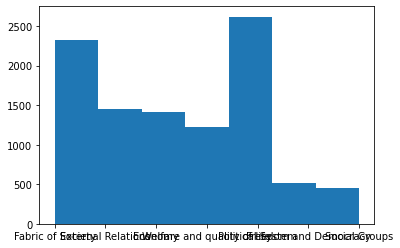

In [16]:
plt.hist(test_data['topic'], bins = 7)
plt.show
test_data['topic']

